In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import type_of_target
import tensorflow as tf
from numpy import unique
from numpy import reshape
from sklearn import metrics
from sklearn.tree import plot_tree
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility
from math import floor
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import LeakyReLU  # Use tensorflow.keras instead of keras
LeakyReLU = LeakyReLU(negative_slope=0.1)
import warnings
import time
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [118]:
#importing the weather dataframe
path = r'C:\Users\karim\Documents\machine learning'
X= pd.read_csv(os.path.join(path, 'data', 'prepared Data', 'machine2_weather_clean.csv'))

In [27]:
df_answers = pd.read_csv(os.path.join(path, 'data', 'original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [29]:
X

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,4,1.0263,0.98
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,1.00
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.85
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.94


In [31]:
df_answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
#dropping date from df_answers
df_answers.drop(columns=['DATE'],axis=1)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Reduce answers dataset to BUDAPEST's answers only

answers_BUDAPEST = df_answers['BUDAPEST_pleasant_weather']
answers_BUDAPEST.shape

(22950,)

In [37]:
#create a sample for Belgrade data
BUDAPEST_list=list(x for x in X.columns if x.find('BUDAPEST')>=0)
BUDAPEST_list

['BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max']

In [39]:
weather_Budapest=X[BUDAPEST_list]
weather_Budapest.shape

(22950, 9)

# Reshaping and Splitting

In [42]:
X_=weather_Budapest
X_.shape

(22950, 9)

In [44]:
y=answers_BUDAPEST
y.shape

(22950,)

In [46]:
 #Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_,y,random_state = 42)

In [48]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


#  Evaluating Hyperparameters

In [94]:
# creating a RF classifier
clf1 = RandomForestClassifier()

In [96]:
# Grid search
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [98]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\karim\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\karim\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\karim\anaconda3\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\karim\anaconda3\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\karim\anaconda3\Lib\site-packa

Search took 1.8880144596099853 minutes


In [99]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [100]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [101]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 3.060131267706553 minutes


In [102]:
# random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 90, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 410}
Best RANDOM search score is: 1.0


In [108]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 90, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 410}
Best RANDOM search score is: 1.0


# Random Forest Model

In [112]:
# creating a RF classifier using random search  that achieved an  accuracy score of 1
clf3 = RandomForestClassifier(criterion= 'entropy', max_depth= 90, max_features= 4, min_samples_leaf=1, min_samples_split=8, n_estimators= 410)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

,n_estimators,410
,criterion,'entropy'
,max_depth,90
,min_samples_split,8
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [120]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


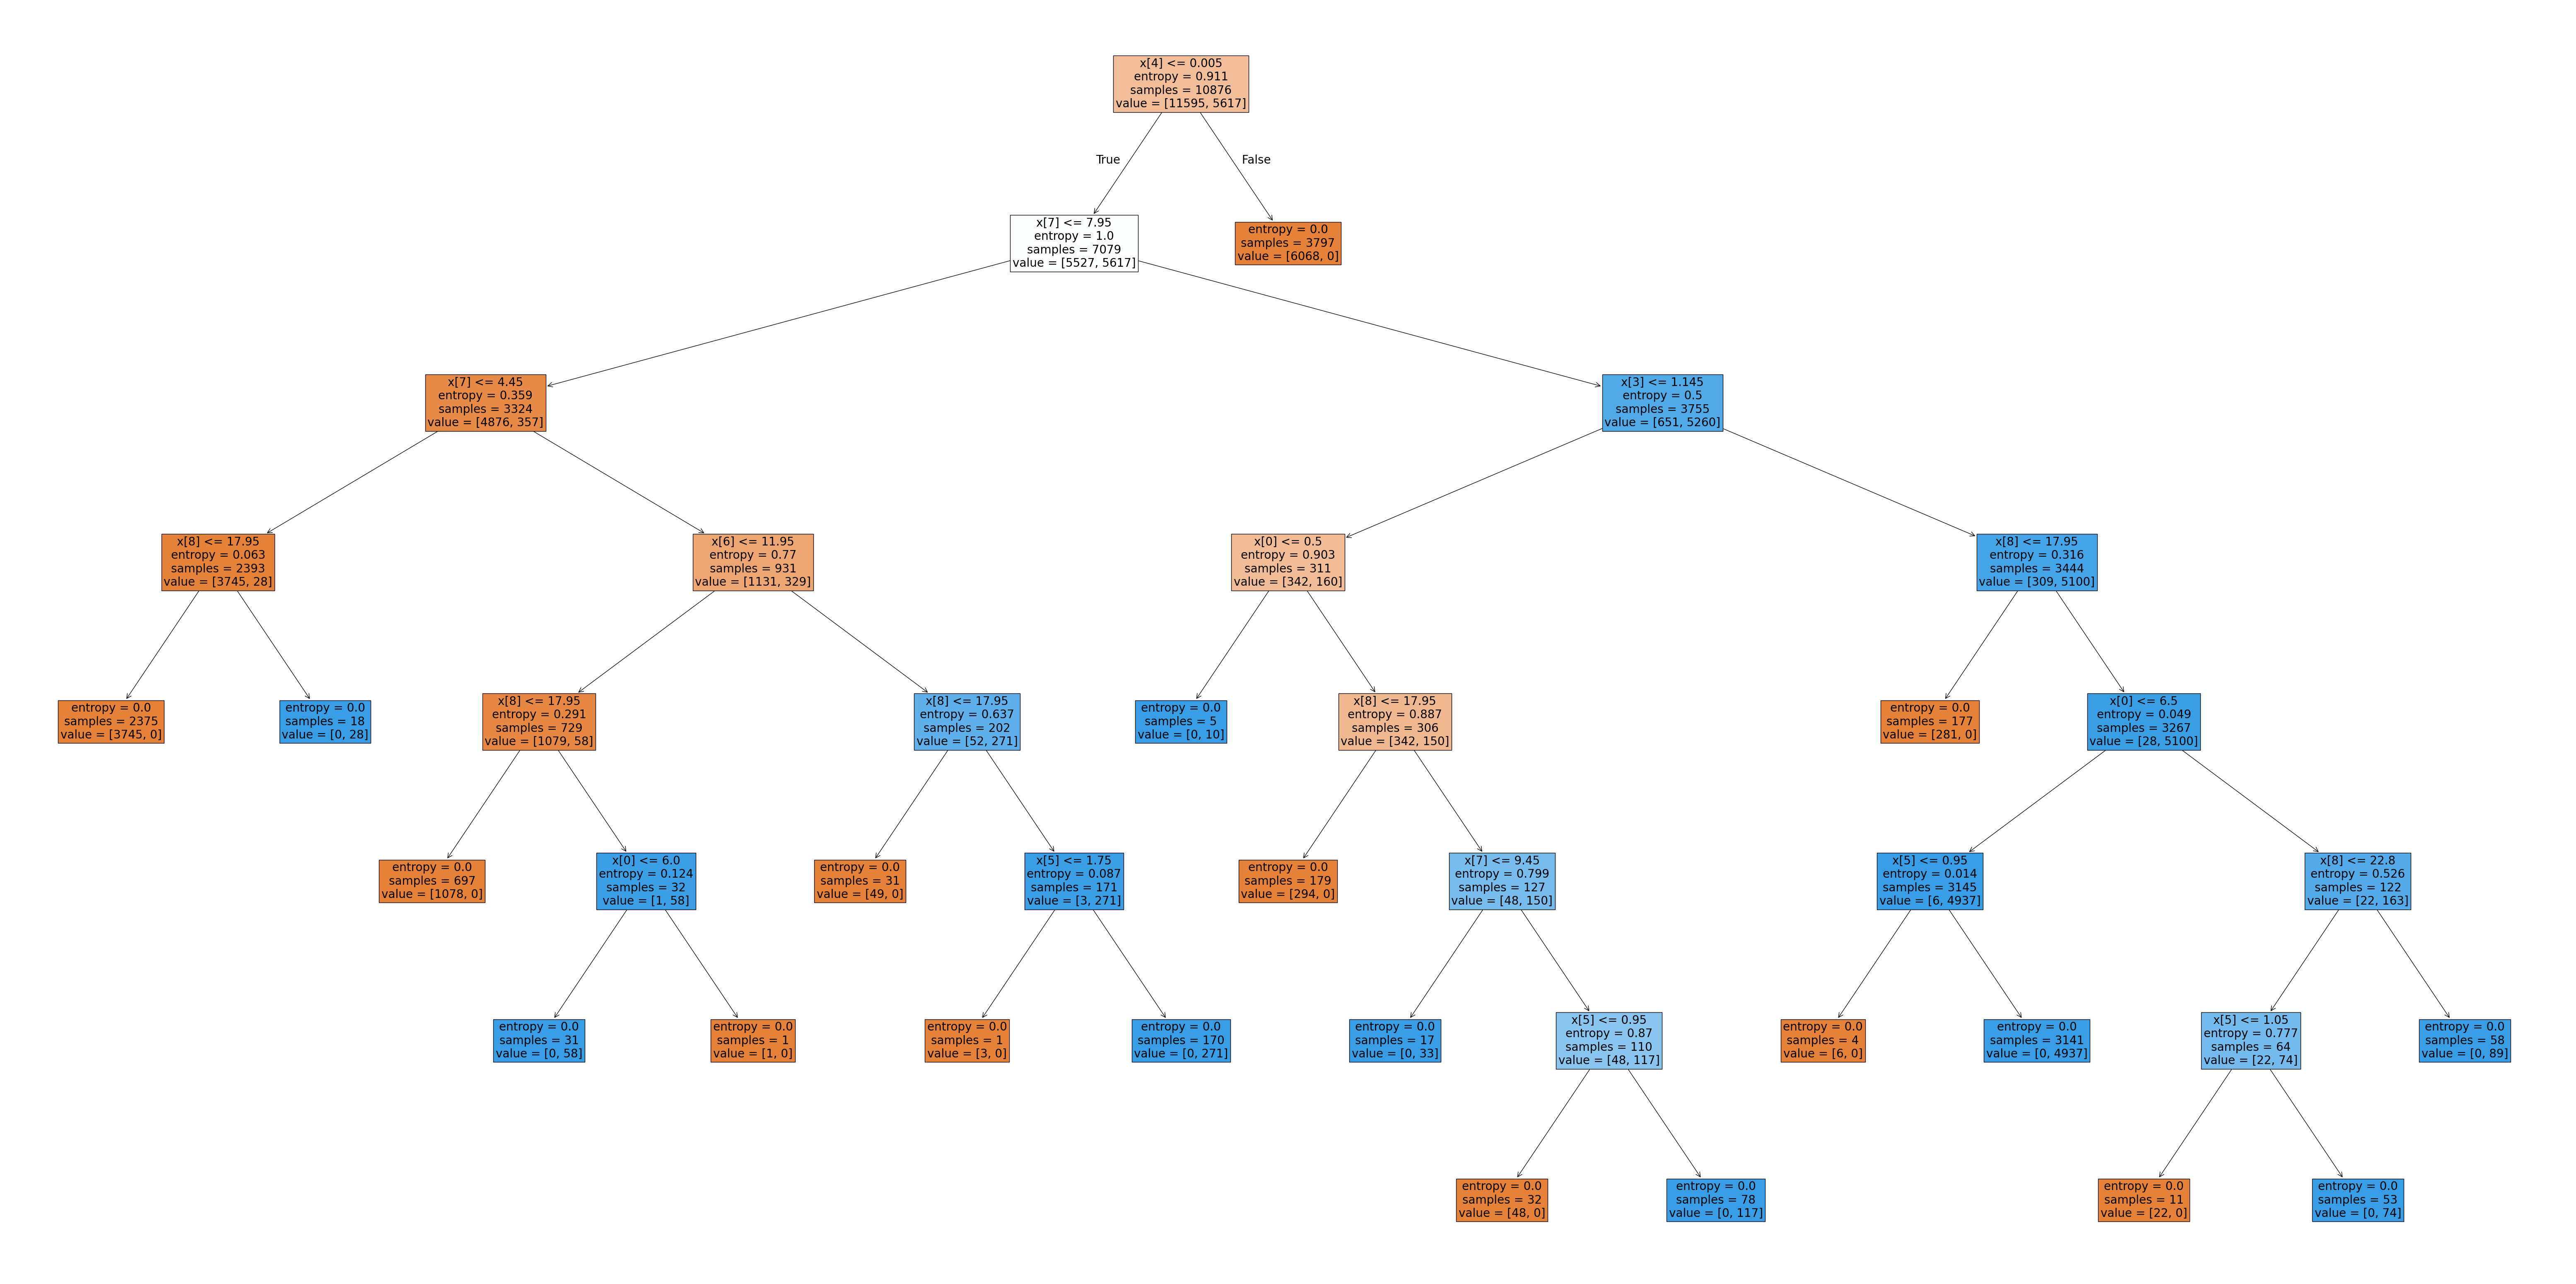

In [128]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, filled=True);

# features inportance

In [130]:
# Make a list (or better, a DataFrame) of feature importances
importances = clf3.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                     Feature  Importance
4     BUDAPEST_precipitation    0.364304
8          BUDAPEST_temp_max    0.342846
6         BUDAPEST_temp_mean    0.157161
7          BUDAPEST_temp_min    0.062948
5          BUDAPEST_sunshine    0.045376
3  BUDAPEST_global_radiation    0.016200
0       BUDAPEST_cloud_cover    0.007949
2          BUDAPEST_pressure    0.001862
1          BUDAPEST_humidity    0.001354


In [132]:
importances.shape

(9,)

In [134]:
#reshapinf feature_importance list
X_reshaped = importances.reshape(1,9,1)
print(X_reshaped.shape)

(1, 9, 1)


In [136]:
#collapsing the shape in one observation
collapsed = np.sum(X_reshaped[0], axis=1)
print(collapsed.shape)

(9,)


In [138]:
BUDAPEST_features = ['_'.join(col.split('_')[1:]) for col in X_]
BUDAPEST_features

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

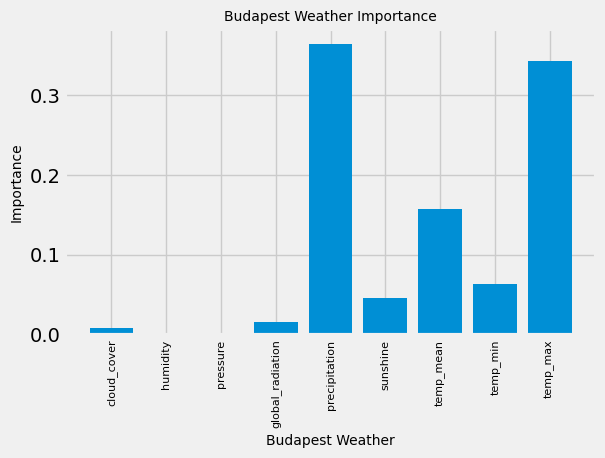

In [140]:
#Plotting 
plt.style.use('fivethirtyeight')

x_values = list(range(len(collapsed)))

plt.bar(BUDAPEST_features, collapsed)
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Importance',fontsize=10)
plt.xlabel('Budapest Weather', fontsize=10)
plt.title('Budapest Weather Importance', fontsize=10)
plt.tight_layout()
plt.show()